In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

In [3]:
data1 = pd.read_csv("file1.csv")
data2 = pd.read_csv("file2.csv")
data3 = pd.read_csv("file3.csv")

In [3]:
data = pd.merge(data1,data2,on="srno_2")

In [4]:
data["yyyymm"] = pd.to_datetime(data["yyyymm"], format='%Y%m')
data[["YN_Web_Active", "YN_secur", "YN_SLR"]] = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].fillna(False)
data[["YN_Web_Active", "YN_secur", "YN_SLR"]]  = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].replace("Y", True)
data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1)

In [10]:
print(data1.describe()) #第一份檔案的資料簡介

              srno_2         gender           age           edu  \
count  200000.000000  200000.000000  200000.00000  200000.00000   
mean   100000.500000       0.399245      39.14153       3.48083   
std     57735.171256       0.489744       9.37352       1.05619   
min         1.000000       0.000000      20.00000       1.00000   
25%     50000.750000       0.000000      31.00000       3.00000   
50%    100000.500000       0.000000      38.00000       3.00000   
75%    150000.250000       1.000000      46.00000       4.00000   
max    200000.000000       1.000000      60.00000       6.00000   

                 mry            job           occp            zip  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.341020       2.507985       6.778830       8.174275   
std         0.474053       1.548751       3.313415       5.762305   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.000000       1.000000       3.000000 

In [11]:
print(data2.describe())#第二份檔案的資料簡介

             srno_2        yyyymm         aum01         aum02         aum03  \
count  2.400000e+06  2.400000e+06  2.400000e+06  2.400000e+06  2.400000e+06   
mean   1.000005e+05  2.022982e+05  1.095106e+05  8.773084e+04  1.115816e+04   
std    5.773504e+04  2.615605e+01  4.303756e+05  3.804042e+05  1.268040e+05   
min    1.000000e+00  2.022120e+05  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.000075e+04  2.023028e+05  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.000005e+05  2.023055e+05  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.500002e+05  2.023082e+05  8.390000e+03  5.988000e+03  0.000000e+00   
max    2.000000e+05  2.023110e+05  7.406994e+07  7.406994e+07  2.007906e+07   

              aum04         aum05         aum06         aum07         aum08  \
count  2.400000e+06  2.400000e+06  2.400000e+06  2.400000e+06  2.400000e+06   
mean   2.177980e+04  2.994499e+03  1.549526e+04  1.550547e+03  4.691206e+02   
std    1.627920e+05  5.290254e+04  1.310568e+05  4.

In [12]:
print(data3.describe())#第三份檔案的資料簡介

              srno_2      rs_prod_1      rs_prod_2      rs_prod_3
count  200000.000000  200000.000000  200000.000000  200000.000000
mean   100000.500000       0.018335       0.028815       0.044790
std     57735.171256       0.134160       0.167287       0.206843
min         1.000000       0.000000       0.000000       0.000000
25%     50000.750000       0.000000       0.000000       0.000000
50%    100000.500000       0.000000       0.000000       0.000000
75%    150000.250000       0.000000       0.000000       0.000000
max    200000.000000       1.000000       1.000000       1.000000


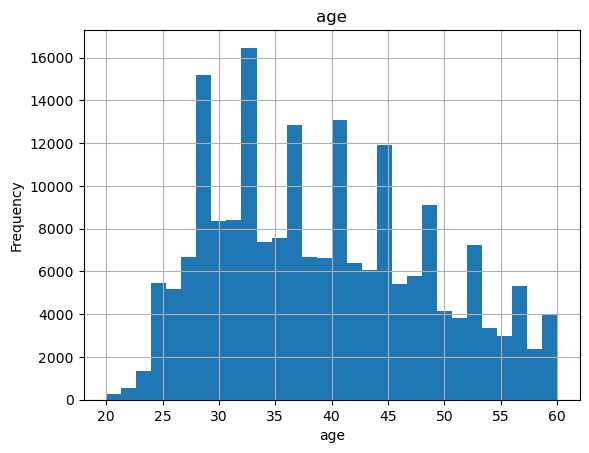

In [17]:
import matplotlib.pyplot as plt

data1['age'].hist(bins=30)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('age')
plt.show()
#年齡分佈圖

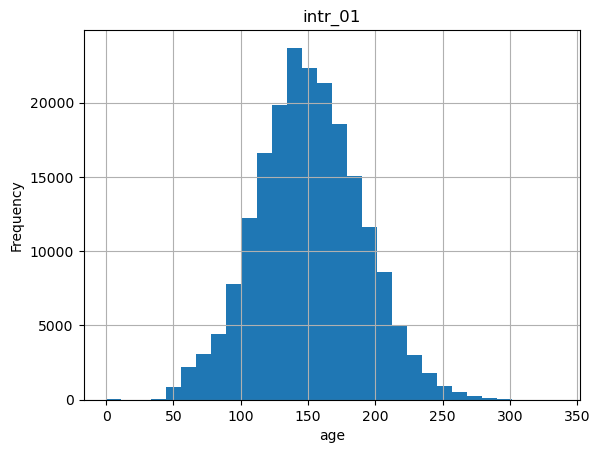

In [18]:
import matplotlib.pyplot as plt

data1['intr_01'].hist(bins=30)
plt.xlabel('intr_01')
plt.ylabel('Frequency')
plt.title('intr_01')
plt.show()
#intr分佈圖

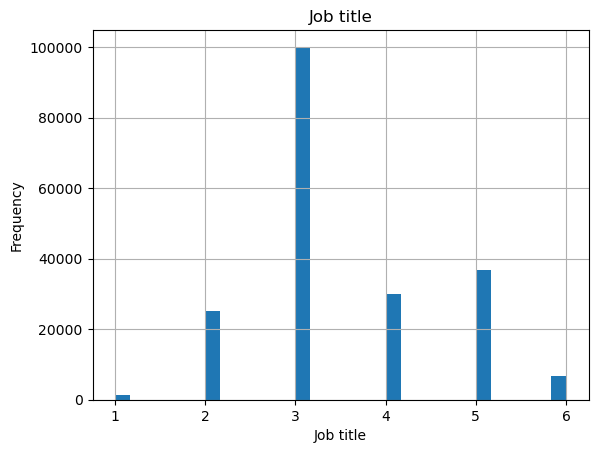

In [4]:
import matplotlib.pyplot as plt

data1['edu'].hist(bins=30)
plt.xlabel('Job title')
plt.ylabel('Frequency')
plt.title('Job title')
plt.show()
#intr分佈圖

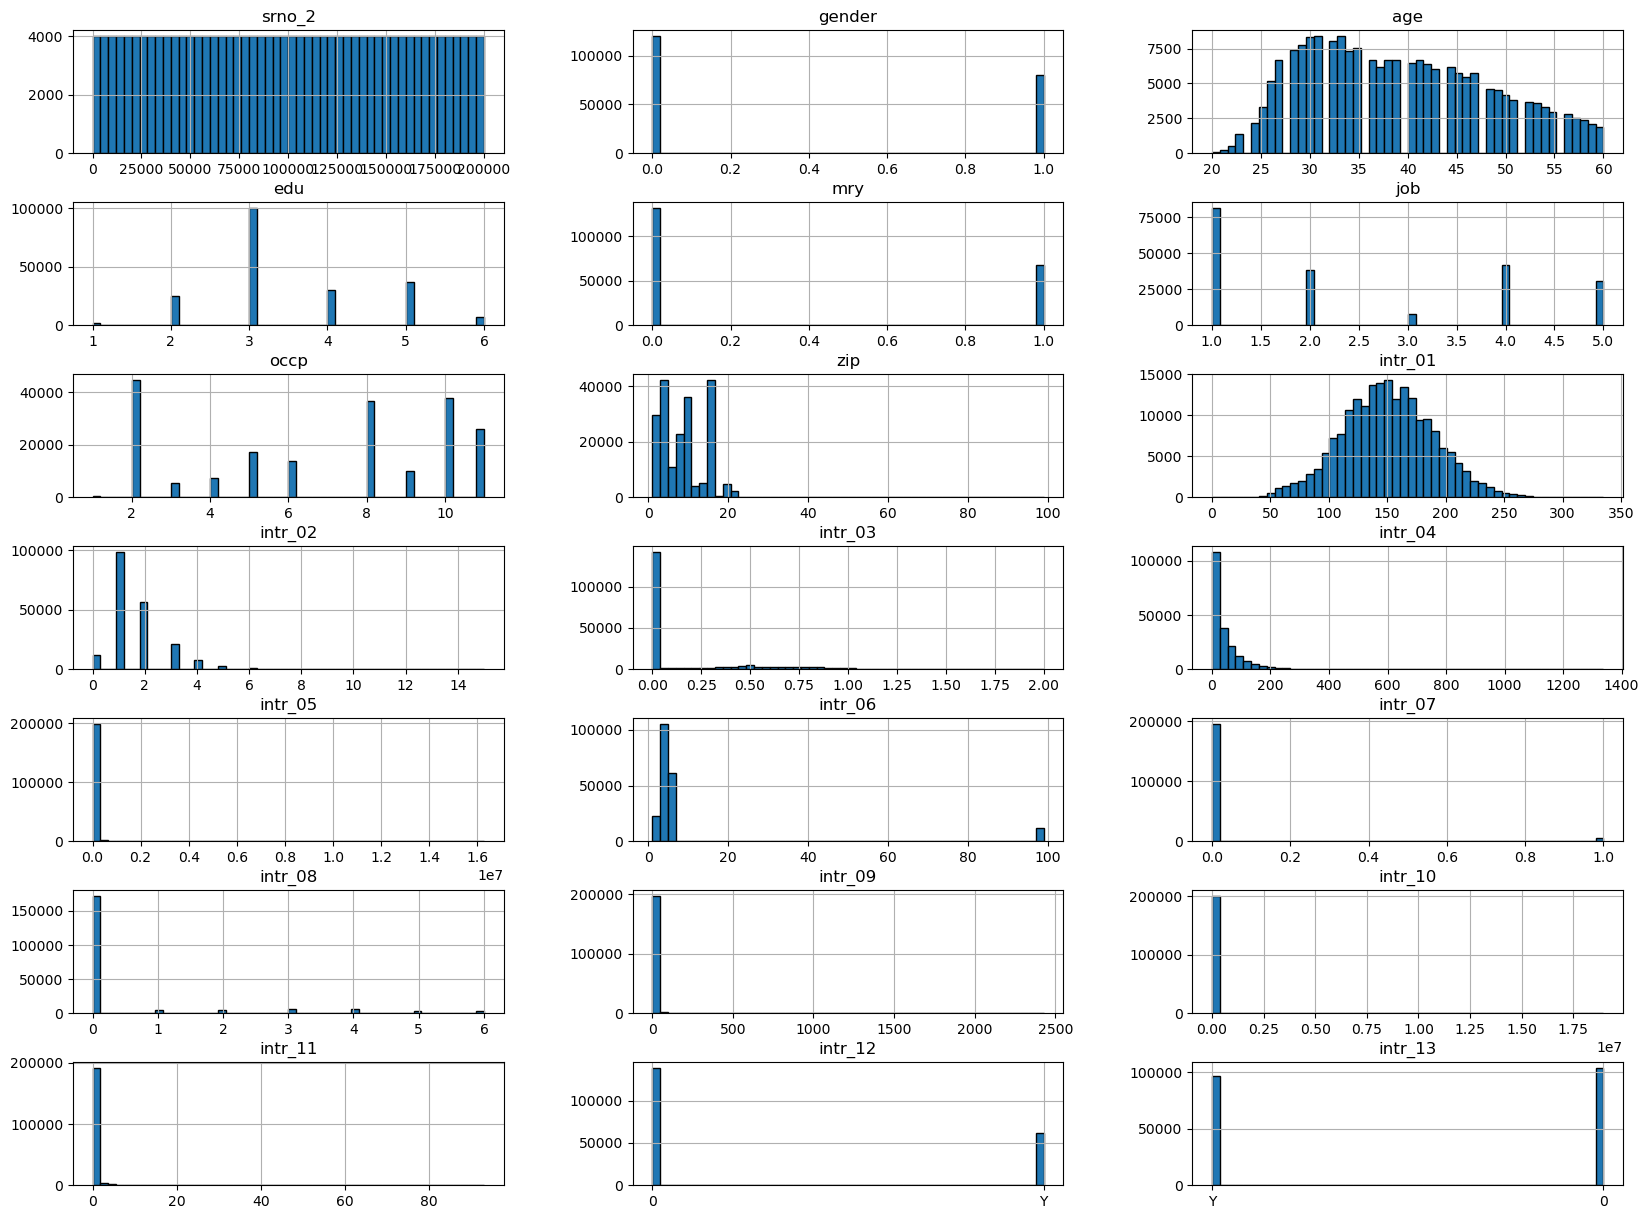

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 設置圖形的大小
plt.figure(figsize=(20, 15))

# 設定子圖的行數和列數
num_columns = len(data1.columns)
num_rows = (num_columns + 2) // 3  # 每行顯示3個直方圖

for i, column in enumerate(data1.columns, 1):
    plt.subplot(num_rows, 3, i)  # 在網格中添加子圖
    data1[column].hist(bins=50, edgecolor='black')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

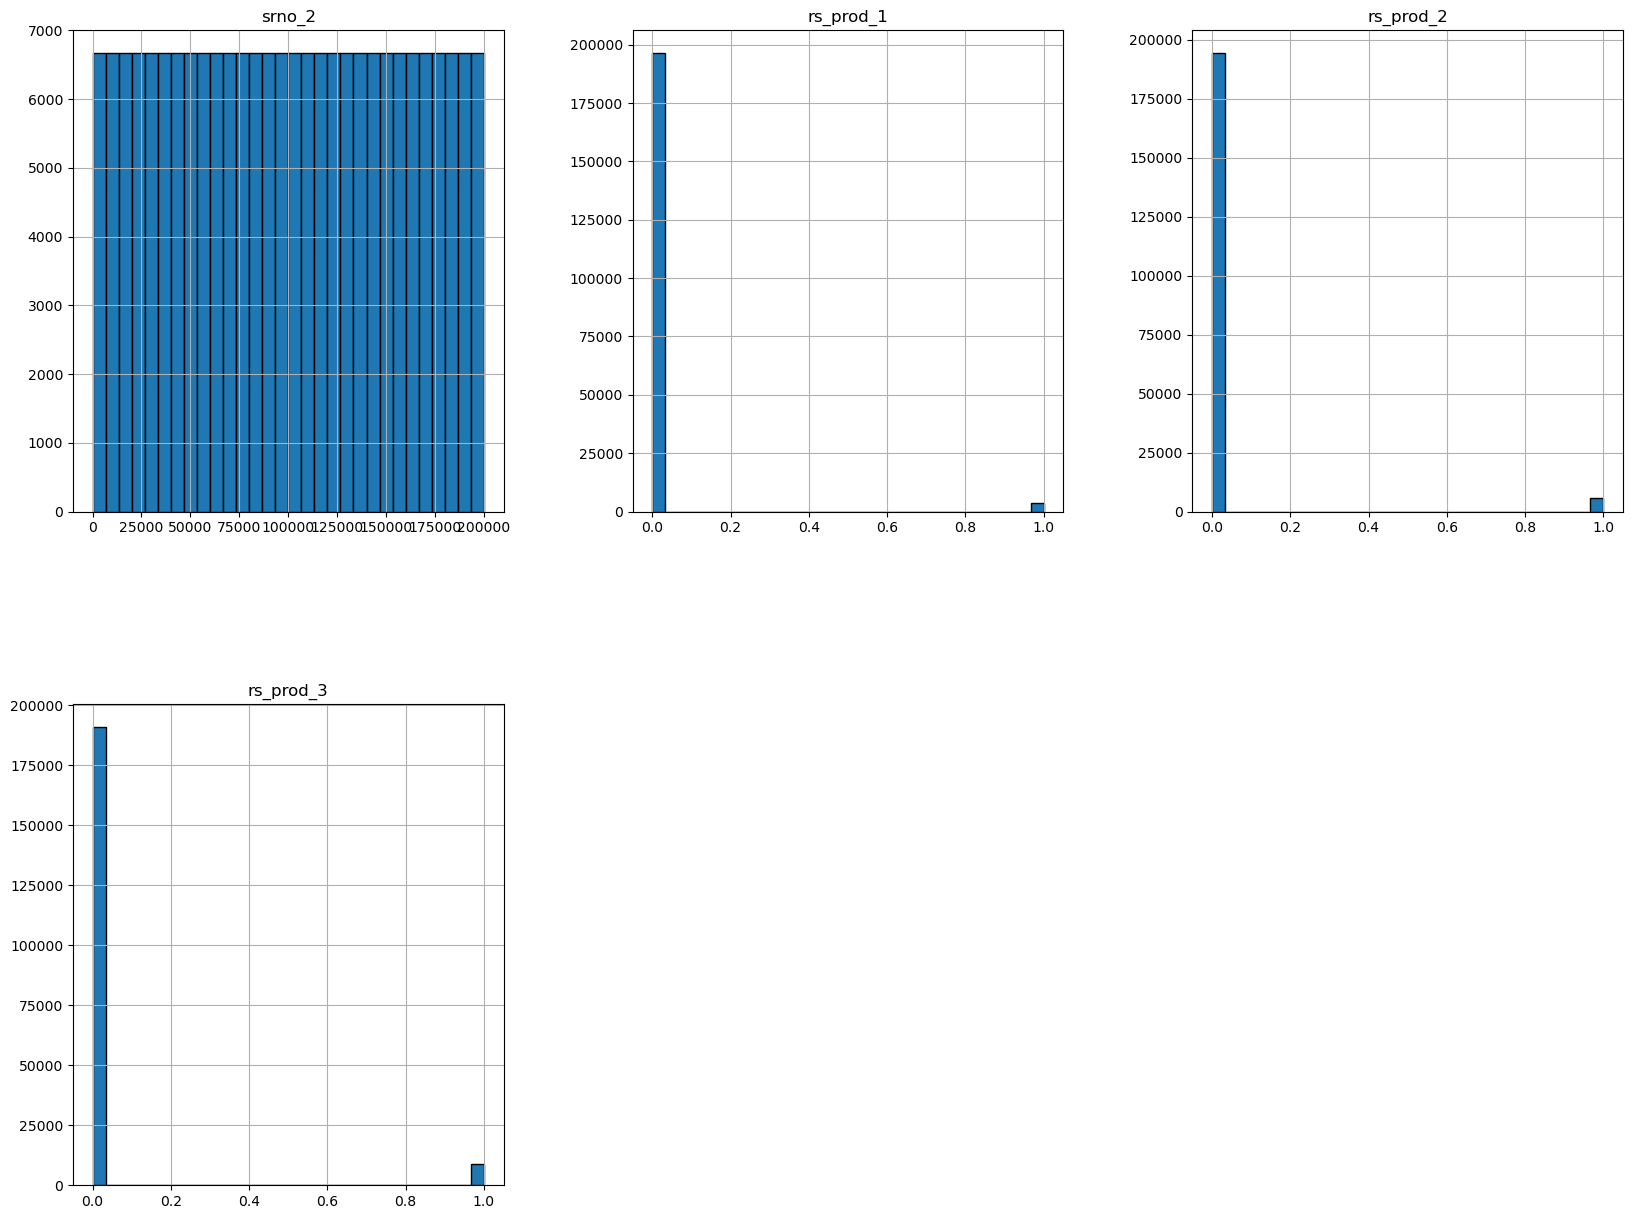

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 設置圖形的大小
plt.figure(figsize=(20, 15))

# 設定子圖的行數和列數
num_columns = len(data3.columns)
num_rows = (num_columns + 2) // 3  # 每行顯示3個直方圖

for i, column in enumerate(data3.columns, 1):
    plt.subplot(num_rows, 3, i)  # 在網格中添加子圖
    data3[column].hist(bins=30, edgecolor='black')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

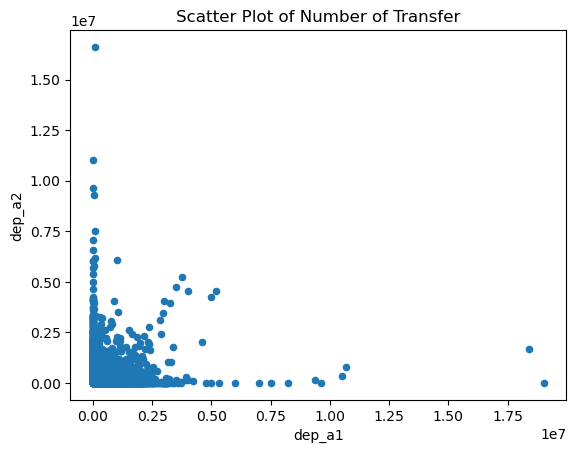

In [59]:
data2.plot.scatter(x='dep_a1', y='dep_a2')
plt.title('Scatter Plot of Number of Transfer')
plt.show()

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 加載數據
data2 = pd.read_csv("file2.csv")

# 選擇特徵和目標變數
features = ['dep_a1', 'dep_a2', 'dep_a3', 'dep_a4', 'dep_c1', 'dep_c2', 
            'dep_c3', 'dep_c4', 'AMT_Exchange_A', 'AMT_Exchange_B', 
            'CNT_Exchange_A', 'CNT_Exchange_B', 'YN_Web_Active']
target = 'rs_prod_3'  # 目標變數

X = data[features]
y = data[target]

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 數據標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 訓練模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 根據預測結果識別潛在客戶
data['prediction'] = model.predict(X)
potential_customers = data[data['prediction'] == 1]  # 假設 1 表示有意願購買基金
print(potential_customers)


[[704367   1368]
 [ 13411    854]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    705735
           1       0.38      0.06      0.10     14265

    accuracy                           0.98    720000
   macro avg       0.68      0.53      0.55    720000
weighted avg       0.97      0.98      0.97    720000

Accuracy: 0.9794736111111111


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


         srno_2  gender  age  edu  mry  job  occp  zip  intr_01  intr_02  ...  \
7459        622       1   28    3    0    5     4    7      126        1  ...   
12086      1008       0   52    5    0    4    10    3      162        1  ...   
13829      1153       1   35    3    0    1     5    1      121        1  ...   
47267      3939       0   33    3    1    4     4    9      195        2  ...   
50787      4233       0   31    3    0    2    11   15      212        3  ...   
...         ...     ...  ...  ...  ...  ...   ...  ...      ...      ...  ...   
2391965  199331       1   29    3    0    1     2    1      228        2  ...   
2394288  199525       0   45    6    1    5    11    3      124        1  ...   
2394929  199578       0   30    2    0    1     5    3      165        1  ...   
2395977  199665       0   52    3    1    1    11    9      218        4  ...   
2399357  199947       1   51    2    0    2     5   16      168        1  ...   

         CNT_Exchange_B  YN

[[294195 411540]
 [  6622   7643]]
              precision    recall  f1-score   support

           0       0.98      0.42      0.58    705735
           1       0.02      0.54      0.04     14265

    accuracy                           0.42    720000
   macro avg       0.50      0.48      0.31    720000
weighted avg       0.96      0.42      0.57    720000

Accuracy: 0.4192194444444444


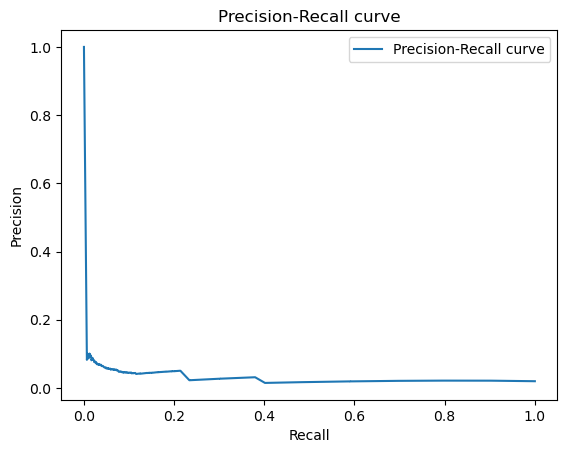

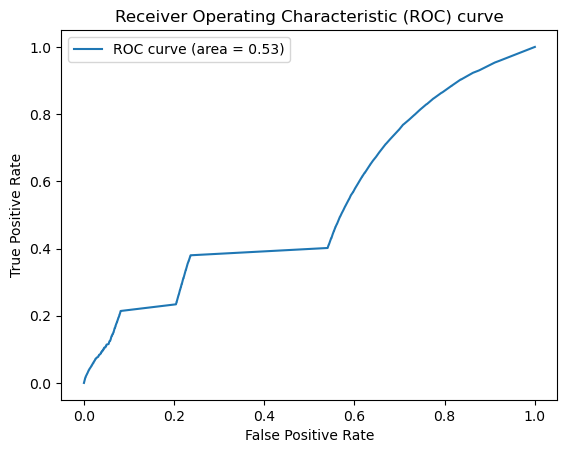

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 加載數據
data2 = pd.read_csv("file2.csv")

# 選擇特徵和目標變數
features = ['dep_a1', 'dep_a2', 'dep_a3', 'dep_a4', 'dep_c1', 'dep_c2', 
            'dep_c3', 'dep_c4', 'AMT_Exchange_A', 'AMT_Exchange_B', 
            'CNT_Exchange_A', 'CNT_Exchange_B', 'YN_Web_Active']
target = 'rs_prod_3'

X = data[features]
y = data[target]

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 數據標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 使用SMOTE進行上採樣
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 訓練模型，調整類別權重
model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)
model.fit(X_resampled, y_resampled)

# 預測
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 設定新的決策閾值
threshold = 0.3
y_pred = (y_pred_proba >= threshold).astype(int)

# 評估模型
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 繪製精確率-召回率曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

# 繪製ROC曲線
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()


In [ ]:
以下為Random forest

In [5]:
def Proportion(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    # 評估模型
    print("Accuracy:", accuracy_score(target_test, y_pred))
    print("Classification Report:\n", classification_report(target_test, y_pred))
    print("CM Report:\n",confusion_matrix(target_test, y_pred))

In [6]:
Proportion(1,10,"rs_prod_3", 10)

目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.967925
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    195609
           1       0.17      0.12      0.14      4391

    accuracy                           0.97    200000
   macro avg       0.58      0.55      0.56    200000
weighted avg       0.96      0.97      0.97    200000

CM Report:
 [[193057   2552]
 [  3863    528]]


In [7]:
def Proportion0_7(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    probabilities = model.predict_proba(features_test)

    # 应用自定义阈值 0.7
    # 默认情况下，正类（1）是第二列
    y_pred_custom_threshold = (probabilities[:, 1] >= 0.7).astype(int)

    # 評估模型
    print("Accuracy:", accuracy_score(target_test, y_pred_custom_threshold))
    print("Classification Report:\n", classification_report(target_test, y_pred_custom_threshold))
    print("CM Report:\n",confusion_matrix(target_test, y_pred_custom_threshold))

In [8]:
Proportion0_7(1,10,"rs_prod_3", 10)

目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.97483
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.25      0.07      0.11      4391

    accuracy                           0.97    200000
   macro avg       0.61      0.53      0.55    200000
weighted avg       0.96      0.97      0.97    200000

CM Report:
 [[194648    961]
 [  4073    318]]


In [29]:
!pip install xgboost
import xgboost as xgb
def xgbmodel(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["YN_Web_Active", "YN_secur", "YN_SLR"]] = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].fillna(False)
    data[["YN_Web_Active", "YN_secur", "YN_SLR"]]  = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].replace("Y", True)
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = xgb.XGBClassifier(n_estimators=100, random_state=42)
    model.fit(features_train, target_train)
    probabilities = model.predict(features_test)

    # 評估模型
    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.7 MB/s eta 0:00:0000:0100:010m


In [35]:
xgbmodel(1,10,"rs_prod_3",10)

Accuracy: 0.97129
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    195609
           1       0.38      0.48      0.42      4391

    accuracy                           0.97    200000
   macro avg       0.68      0.73      0.70    200000
weighted avg       0.97      0.97      0.97    200000

CM Report:
 [[192164   3445]
 [  2297   2094]]


In [39]:
from sklearn.linear_model import Lasso
def lassomodel0_5(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=42)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))

In [45]:
lassomodel0_5(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.9771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195258    351]
 [  4229    162]]


In [46]:
def lassomodel1(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [47]:
lassomodel_1 = lassomodel1(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.9771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195258    351]
 [  4229    162]]


In [48]:
def lassomodel2(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=2)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [49]:
lassomodel_2 = lassomodel2(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.977085
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195247    362]
 [  4221    170]]


In [50]:
def lassomodel3(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=3)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [51]:
lassomodel_3 = lassomodel3(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.684e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.97727
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.34      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.66      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195294    315]
 [  4231    160]]


In [52]:
def lassomodel4(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=4)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [53]:
lassomodel_4 = lassomodel4(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.641e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.977095
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.33      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195241    368]
 [  4213    178]]


In [54]:
def lassomodel5(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=5)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [55]:
lassomodel_5 = lassomodel5(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.977215
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.34      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.66      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195274    335]
 [  4222    169]]


In [56]:
def lassomodel6(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=6)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [57]:
lassomodel_6 = lassomodel6(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.679e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.97722
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.33      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.66      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195277    332]
 [  4224    167]]


In [58]:
def lassomodel7(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=7)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [59]:
lassomodel_7 = lassomodel7(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.977215
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.03      0.06      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195290    319]
 [  4238    153]]


In [60]:
def lassomodel8(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=8)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [61]:
lassomodel_8 = lassomodel8(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.977195
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.33      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.66      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195269    340]
 [  4221    170]]


In [62]:
def lassomodel9(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=9)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [63]:
lassomodel_9 = lassomodel9(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.676e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.977175
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.04      0.06      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195279    330]
 [  4235    156]]


In [64]:
def lassomodel10(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=10)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [65]:
lassomodel_10 = lassomodel10(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.97721
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.33      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195281    328]
 [  4230    161]]


In [66]:
def lassomodel11(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].fillna(0)
    data[['YN_Web_Active','YN_secur','YN_SLR']] = data[['YN_Web_Active','YN_secur','YN_SLR']].replace('Y', 1)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=11)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = Lasso(alpha=0.1, random_state=1)
    model.fit(features_train,target_train)
    y_prob = model.predict(features_test)
    probabilities = np.where(y_prob >= 0.5, 1, 0)


    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))
    return probabilities

In [67]:
lassomodel_11 = lassomodel11(1,10,"rs_prod_3",10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.639e+04, tolerance: 3.964e+00
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.97712
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195264    345]
 [  4231    160]]


In [70]:
lassomodel_sum = lassomodel_1 + lassomodel_2 + lassomodel_3 + lassomodel_4 + lassomodel_5 + lassomodel_6 + lassomodel_7 + lassomodel_8 + lassomodel_9 + lassomodel_10 + lassomodel_11
lassomodel_sum_5 = (lassomodel_sum >= 5).astype(int)

test_df = data[data["yyyymm"] == "2023-11"]
target_test = test_df["rs_prod_3"]
print("Classification Report:\n", classification_report(target_test, lassomodel_sum_5))
print("CM Report:\n",confusion_matrix(target_test, lassomodel_sum_5))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195253    356]
 [  4225    166]]


In [71]:
lassomodel_sum_6 = (lassomodel_sum >= 6).astype(int)

test_df = data[data["yyyymm"] == "2023-11"]
target_test = test_df["rs_prod_3"]
print("Classification Report:\n", classification_report(target_test, lassomodel_sum_6))
print("CM Report:\n",confusion_matrix(target_test, lassomodel_sum_6))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.32      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195263    346]
 [  4225    166]]


In [72]:
lassomodel_sum_7 = (lassomodel_sum >= 7).astype(int)

test_df = data[data["yyyymm"] == "2023-11"]
target_test = test_df["rs_prod_3"]
print("Classification Report:\n", classification_report(target_test, lassomodel_sum_7))
print("CM Report:\n",confusion_matrix(target_test, lassomodel_sum_7))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    195609
           1       0.33      0.04      0.07      4391

    accuracy                           0.98    200000
   macro avg       0.65      0.52      0.53    200000
weighted avg       0.96      0.98      0.97    200000

CM Report:
 [[195272    337]
 [  4228    163]]


In [75]:
def xgbmodel1(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理#跑一到十次
    data[["YN_Web_Active", "YN_secur", "YN_SLR"]] = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].fillna(False)
    data[["YN_Web_Active", "YN_secur", "YN_SLR"]]  = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].replace("Y", True)
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = xgb.XGBClassifier(n_estimators=100, random_state=42)
    model.fit(features_train, target_train)
    probabilities = model.predict(features_test)

    return probabilities

In [76]:
xgboost_1 = xgbmodel1(1,10,"rs_prod_3",10)#跑一到十次

In [89]:
def Proportion1(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [79]:
def Proportion2(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=2)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [80]:
def Proportion3(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=3)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [92]:
def Proportion4(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=4)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [81]:
def Proportion5(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=5)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [82]:
def Proportion6(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=6)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [83]:
def Proportion7(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=7)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [84]:
def Proportion8(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=8)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [85]:
def Proportion9(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=9)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [86]:
def Proportion10(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=10)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [87]:
def Proportion11(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=11)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    return y_pred

In [93]:
Proportion_1 = Proportion1(1,10,"rs_prod_3",10)
Proportion_2 = Proportion2(1,10,"rs_prod_3",10)
Proportion_3 = Proportion3(1,10,"rs_prod_3",10)
Proportion_4 = Proportion4(1,10,"rs_prod_3",10)
Proportion_5 = Proportion5(1,10,"rs_prod_3",10)
Proportion_6 = Proportion6(1,10,"rs_prod_3",10)
Proportion_7 = Proportion7(1,10,"rs_prod_3",10)
Proportion_8 = Proportion8(1,10,"rs_prod_3",10)
Proportion_9 = Proportion9(1,10,"rs_prod_3",10)
Proportion_10 = Proportion10(1,10,"rs_prod_3",10)
Proportion_11 = Proportion11(1,10,"rs_prod_3",10)


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


目前的主題是基金
目前訓練集包含11個月的資料
訓練集大小為: 479677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
# 計算 Proportion 的總和
Proportion_sum = Proportion_1 + Proportion_2 + Proportion_3 + Proportion_4 + Proportion_5 + Proportion_6 + Proportion_7 + Proportion_8 + Proportion_9 + Proportion_10 + Proportion_11

# 將 Proportion 的總和轉換為二元分類結果
Proportion_sum_5 = (Proportion_sum >= 5).astype(int)

# 選擇測試集
test_df = data[data["yyyymm"] == "2023-11"]

# 提取目標測試值
target_test = test_df["rs_prod_3"]

# 打印分類報告和混淆矩陣
print("Classification Report:\n", classification_report(target_test, Proportion_sum_5))
print("CM Report:\n", confusion_matrix(target_test, Proportion_sum_5))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    195609
           1       0.17      0.12      0.14      4391

    accuracy                           0.97    200000
   macro avg       0.57      0.55      0.56    200000
weighted avg       0.96      0.97      0.97    200000

CM Report:
 [[193007   2602]
 [  3864    527]]


In [97]:
Proportion_sum_6 = (Proportion_sum >= 6).astype(int)

test_df = data[data["yyyymm"] == "2023-11"]
target_test = test_df["rs_prod_3"]
print("Classification Report:\n", classification_report(target_test, Proportion_sum_6))
print("CM Report:\n",confusion_matrix(target_test, Proportion_sum_6))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    195609
           1       0.17      0.12      0.14      4391

    accuracy                           0.97    200000
   macro avg       0.58      0.55      0.56    200000
weighted avg       0.96      0.97      0.97    200000

CM Report:
 [[193065   2544]
 [  3868    523]]


In [98]:
Proportion_sum_7 = (Proportion_sum >= 7).astype(int)

test_df = data[data["yyyymm"] == "2023-11"]
target_test = test_df["rs_prod_3"]
print("Classification Report:\n", classification_report(target_test, Proportion_sum_7))
print("CM Report:\n",confusion_matrix(target_test, Proportion_sum_7))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    195609
           1       0.17      0.12      0.14      4391

    accuracy                           0.97    200000
   macro avg       0.58      0.55      0.56    200000
weighted avg       0.96      0.97      0.97    200000

CM Report:
 [[193114   2495]
 [  3872    519]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
def svmmodel(start_month, end_month, target="rs_prod_1", proportion=10):
    # 資料預處理
    data[["YN_Web_Active", "YN_secur", "YN_SLR"]] = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].fillna(False)
    data[["YN_Web_Active", "YN_secur", "YN_SLR"]]  = data[["YN_Web_Active", "YN_secur", "YN_SLR"]].replace("Y", True)
    data[["intr_12","intr_13"]] = data[["intr_12","intr_13"]].replace("Y",1).astype(int)
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=11)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    #print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    #print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    model = SVC(kernel='rbf')
    model.fit(features_train, target_train)
    probabilities = model.predict(features_test)

    print("Accuracy:", accuracy_score(target_test, probabilities))
    print("Classification Report:\n", classification_report(target_test, probabilities))
    print("CM Report:\n",confusion_matrix(target_test, probabilities))

In [104]:
svmmodel(1,10,"rs_prod_3", 10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


KeyboardInterrupt: 

In [102]:
def Proportion(start_month, end_month, target="rs_prod_1", proportion=10):
    if(target=="rs_prod_1"):
        print("目前的主題是貸款")
    elif(target=="rs_prod_2"):
        print("目前的主題是換匯")
    else:
        print("目前的主題是基金")
    # 資料預處理
    train_df = data[(data["yyyymm"] <= f"2023-{end_month}") & (data["yyyymm"] >= "2022-12")]
    test_df = data[data["yyyymm"] == f"2023-{end_month+1}"]
    train_df_0 = train_df[train_df[f"{target}"]==0]
    train_df_1 = train_df[train_df[f"{target}"]==1]
    sampled_df = train_df_0.sample(n=proportion*len(train_df_1), random_state=1)
    result_df = pd.concat([sampled_df, train_df_1], ignore_index=True)
    print(f"目前訓練集包含{int(len(train_df)/200000)}個月的資料")
    print(f"訓練集大小為: {len(result_df)}")
    # 設定訓練集和測試集
    features_train = result_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_train = result_df[f'{target}']
    features_test = test_df.drop([f'{target}', 'yyyymm'], axis=1)
    target_test = test_df[f'{target}']
    # 訓練模型
    model = LogisticRegression()
    model.fit(features_train, target_train)
    # # 在測試集上進行預測
    y_pred = model.predict(features_test)

    # 評估模型
    print("Accuracy:", accuracy_score(target_test, y_pred))
    print("Classification Report:\n", classification_report(target_test, y_pred))
    print("CM Report:\n",confusion_matrix(target_test, y_pred))

In [103]:
Proportion(1,5,"rs_prod_3", 10)

目前的主題是基金
目前訓練集包含6個月的資料
訓練集大小為: 272987


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96944
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    195939
           1       0.15      0.11      0.13      4061

    accuracy                           0.97    200000
   macro avg       0.57      0.55      0.56    200000
weighted avg       0.96      0.97      0.97    200000

CM Report:
 [[193441   2498]
 [  3614    447]]
